# Machine learning em Stock market 
-Utilizando xgboost

-Regressão linear

In [95]:
import pandas as pd
%pip install xgboost
import xgboost as xb 
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
#Dando load no dado S&P 500 encontrado nesse link: https://www.kaggle.com/code/janiobachmann/s-p-500-time-series-forecasting-with-prophet/notebook
data = pd.read_csv('Data//all_stocks_5yr.csv')
data.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [97]:
data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [98]:
#Apenas vou selecionar os stocks da Amazon nesse modelo
AMZN = data.loc[data['Name']=='AMZN']
AMZN.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07


<Axes: >

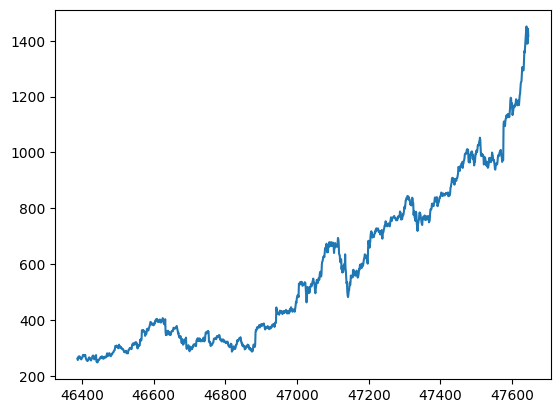

In [99]:
#Analisando a database da Amazon

AMZN['close'].plot()


In [100]:
#Separar os dados entre testing e training
training_data = data[:int(len(data)*0.8)]
testing_data = data[int(len(data)*0.8):]

In [101]:
#Definir as variaveis 
_features = ['open', 'volume']
#Variavel target (O que queremos prever)
_target = 'close'

In [102]:
#Criar o modelo de ML e fazer a previsão
model = xb.XGBRegressor()
model.fit(training_data[_features], training_data[_target])

predictions = model.predict(testing_data[_features])
print("Predictions:")
print(predictions)


Predictions:
[52.07648  52.37065  52.085934 ... 76.72886  72.57493  72.57493 ]


In [103]:
#
print("valores reais:")
print(testing_data[_target])

valores reais:
495232    52.30
495233    52.09
495234    52.56
495235    52.61
495236    52.27
          ...  
619035    77.82
619036    76.78
619037    73.83
619038    73.27
619039    73.86
Name: close, Length: 123808, dtype: float64


In [104]:
#Mostrar a precisão do modelo
accuracy = model.score(testing_data[_features], testing_data[_target])
print("Accuracy")
print(accuracy)

Accuracy
0.9986386194662038


In [120]:
#Depois de testar a precisão acima vou tentar prever o gráfico inteiro
test_dta = AMZN.iloc[:int(.99*len(AMZN)), :]
pred = model.predict(test_dta[_features])
print(pred)

[ 262.8817   262.58914  262.7769  ... 1088.1624  1114.2869  1116.3425 ]


In [121]:
#Mostrar a precisão do modelo
accuracy = model.score(test_dta[_features], test_dta[_target])
print("Accuracy")
print(accuracy)

Accuracy
0.9639876953203268


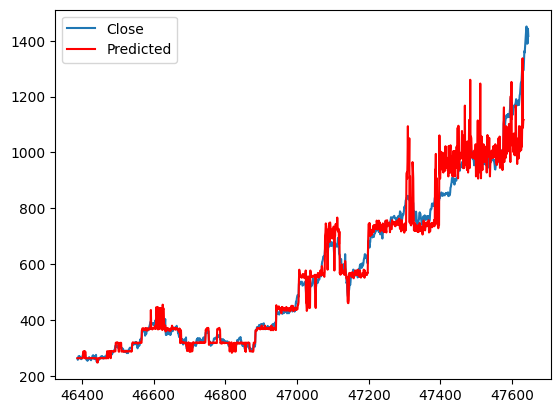

In [122]:
#Fazero o plot do close + previsoes
plt.plot(AMZN['close'], label='Close')
plt.plot(test_dta[_target].index, pred, color='r', label='Predicted')
plt.legend()
plt.show()
    

## Comentarios
Percebe-se que ele começou a previsão de forma correta, mas a partir dos 60% em diante sua precisão caiu muito. REVER O MODELO